<a href="https://colab.research.google.com/github/precal171/skills-code-with-codespaces/blob/main/Volcano_Plot_Code_for_mass_spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl xlrd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


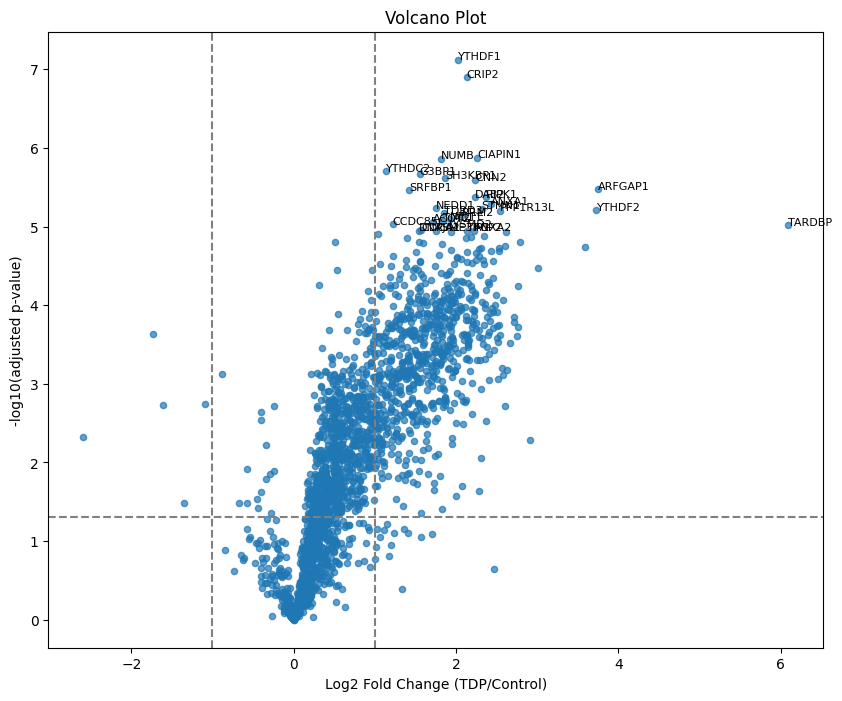

In [4]:

# Read data from Excel file in Google Drive
df = pd.read_excel('/content/drive/MyDrive/tdp_volcano.xlsx')  # Update with your file path and sheet name

# Calculate the mean and standard deviation for each group
df['Control_Mean'] = df[['Abundance S1', 'Abundance S2', 'Abundance S3']].mean(axis=1)
df['Control_Std'] = df[['Abundance S1', 'Abundance S2', 'Abundance S3']].std(axis=1)
df['TDP_Mean'] = df[['Abundance T1', 'Abundance T2', 'Abundance T3']].mean(axis=1)
df['TDP_Std'] = df[['Abundance T1', 'Abundance T2', 'Abundance T3']].std(axis=1)

# Calculate the log2 fold change and p-values
df['log2FC'] = np.log2(df['TDP_Mean'] / df['Control_Mean'])

p_values = []
for i in range(len(df)):
    control_vals = [df['Abundance S1'][i], df['Abundance S2'][i], df['Abundance S3'][i]]
    tdp_vals = [df['Abundance T1'][i], df['Abundance T2'][i], df['Abundance T3'][i]]
    t_stat, p_val = stats.ttest_ind(control_vals, tdp_vals)
    p_values.append(p_val)
df['p_value'] = p_values

# Adjust p-values (replace with your preferred method if needed)
df['adj_p_value'] = p_values

# Sort by adjusted p-value and select top 30
top_30_genes = df.sort_values(by=['adj_p_value']).head(30)

# Volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(df['log2FC'], -np.log10(df['adj_p_value']), s=20, alpha=0.7)
plt.xlabel('Log2 Fold Change (TDP/Control)')
plt.ylabel('-log10(adjusted p-value)')
plt.title('Volcano Plot')

# Add labels for top 30 genes
for i in top_30_genes.index:
    plt.text(top_30_genes['log2FC'][i], -np.log10(top_30_genes['adj_p_value'][i]),
             top_30_genes['Gene Symbol'][i], fontsize=8)

plt.axhline(-np.log10(0.05), linestyle='--', color='gray')  # Significance line
plt.axvline(1, linestyle='--', color='gray')
plt.axvline(-1, linestyle='--', color='gray')
plt.show()